# IE 423 Quality Engineering

# Project Part 3

## Introduction

This project aims to detect defectives in linen manufacturing. Before going deep into processes, we need to understand what is linen and what is defective. Linen is a flax-based textile that is predominantly used for homeware applications. While linen is similar to cotton, it is made from fibres derived from the stems of the flax plant instead of the bolls that grow around cotton seeds. General definition of defect is: “Frailty or shortcoming that prevents an item from being complete, desirable, effective, safe, or of merit, or makes it to malfunction or fail in its purpose.”1In the context of linen manufacturing we can define defects as machine faults, excessive stretching, hole, scratch, poor finishing. Defects causes decrease in quality which causes customer satisfaction and loss in sales. Therefore, manufacturer needs to detect defects before selling the product to customer. A statistic shows that, defects in fabrics can reduce the price of a product by 45% to 65%. Since loss in quality increases cost, quality inspection has been one of the important aspects of manufacturing beginning with the Industrial Revolution. Before the rise of image processing techniques and computation power, the method for quality inspection was manual inspection. There were workers just for the quality inspection however research shows that even the highest fabric inspector is capable of identifying only up-to 30% of defects, whereas 70% remains unidentified, till it reaches the end-user. Humans are prone to errors, this leaded to using image processing or other technological techniques to automate and digitalize quality inspection. With the improvement in algorithms, computation power digital inspection became less costly and more efficient than manual inspection. To conclude, we are going to implement an algorithm and show the results in linen manufacturing.

## Background Information

Detection of defectives that are stemming from reasons such as machine failures, material defects or poor finishing is a problematic issue in textile production as it is mentioned before. While the identification of these errors was done in a more manual way in the past, with the digitalisation of the world now the detection process for different type of fabrics more depends on automated ways that were gone through in the literature and which will be explained in detail in this part of the project. 

One method that was developed by Jagruti Mahure and Y.C.Kulkarni is to use image processing technique in MATLAB for fabrics fault processing. In this process, as they mentioned “The system should be able to take the input as the faulty fabric image and then convert that image in to the gray scale image. Proper noise removal of the image should be done and it should be converted to the corresponding binary image. The result should be displayed in the form of the histogram and depending upon the prescribed properties of the histogram the output is displayed. In addition to the histogram properties the thresholding function that is being defined is also being considered for the output..”. 
	
Zhang and Bresee compared various image analysis techniques aimed at recognising and classifying two kinds of faults, those of yarn joints and thick places occurring in woven fabrics. They applied image segmentation using threshold values of the object’s mask. Independently, they also carried out procedures of image quality improvement using correction operations such as histogram levelling, autocorrelation, erosion, and dilatation. They stated that applying image correction with the use of the method of statistically determining the image’s grey level (threshold procedure) is more efficient than morphological operations using simple procedures of removing the differences of the object’s mask by erosion or dilatation. According to Zhang and Bresee, applying morphological methods for the image processing technique requires greater calculation power compared with using the statistical methods, considering the higher quality of processing the image mask which is demanded.

Several methods were applied in order to come up with a solution for detecting defectives on a fabric in an automated way in order to reduce cost and increase efficiency in a production scheme. In this project, we have chosen our method according to the literature search we have conducted so that the process would be more cost effective and implementable. The method that is chosen and how it is implemented will be explained in detail in the next part of the project.

## Approach

After going through several literature to solve the defect detention problem automatically, one method was chosen to solve the issue effectively. The method in detail might be explained as follows. At first, the 20 sample linen photographs were taken and named as img1, img2, … , img20. One photograph(img4) was drawn as an example to see whether the photographs are taken correctly or not. Gabor filter is used in this approach in order to detect a defective. What Gabor filter does is mainly, it creates grey scale ellipses with orientation and scale. The orientation is basically the angle of the ellipse while the scale is the measure of how big the ellipse is. In this project, 5 scales and 8 orientations were chosen in Gabor filter. In order to detect a defective in a photograph, 40 experiments need to be conducted which are the combinations of the 5 scales and 8 orientations. The filter out of 40 experiments that gives the best solution needs to be chosen for further analysis. In this project, the filters were applied to the img4 as an example. As can be seen in the pictures of the 40 combinations, 5th scale and the 1st orientation of the Gabor filter shows the defective clearly for the img4. For the sake of simplicity and effectivity, instead of applying all combinations of filters to the 20 sample photographs, the Gabor filter that is most appropriate to each photograph was chosen to be applied for each photograph. By the structure of the linen, the defects might be seen either on the vertical axis or the horizontal axis. So, the Gabor filter that needs to be implied, should be on these axes which are named as gf1 and gf2. Thanks to this approach, the burden with the computational complexity was reduced significantly. 2 pictures were drawn for img16 as an example where the first picture shows the Gabor filter with vertical axis, the second picture is the one with horizontal axis. Since the defect is on the vertical axis, it can be seen that the Gabor filter with the horizontal axis yields a better solution. For the sake of simplicity, instead of applying control charts to all images, img16 was chosen as a subject and analysed thoroughly.  T-charts, ellipse charts and x-bar charts were created for the subject. For the T-chart and ellipse chart, each columns and each rows were treated as separate attributes. These two attributes were plotted on these charts. These two attributes were analysed separately for the x-bar chart to see whether the process is in control or not. All related steps, images and codes might be seen in the HTML file. The result of these charts are explained in detail in the next section.

## Code

In [1]:
install.packages('OpenImageR')
install.packages('wvtool')
install.packages('qcc')

Installing package into 'C:/Users/Arda/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'RcppArmadillo'



package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'OpenImageR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Arda\AppData\Local\Temp\Rtmp04v74U\downloaded_packages


Installing package into 'C:/Users/Arda/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'wvtool' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Arda\AppData\Local\Temp\Rtmp04v74U\downloaded_packages


Installing package into 'C:/Users/Arda/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'qcc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Arda\AppData\Local\Temp\Rtmp04v74U\downloaded_packages


In [2]:
library(jpeg)
library(wvtool)
library(OpenImageR)
library(qcc)

Warning message:
"package 'OpenImageR' was built under R version 3.6.2"Warning message:
"package 'qcc' was built under R version 3.6.2"Package 'qcc' version 2.7
Type 'citation("qcc")' for citing this R package in publications.


In [3]:
for(i in 1:20) { 
     name <- paste("img", i, sep = "")
     temp <- paste("C:/Users/Arda/Desktop/project_part_3_images/Images/Fabric",i,sep = "") 
     adress <- paste(temp,".jpg",sep = "")
     assign(name,readJPEG(adress, native=FALSE)) 
}

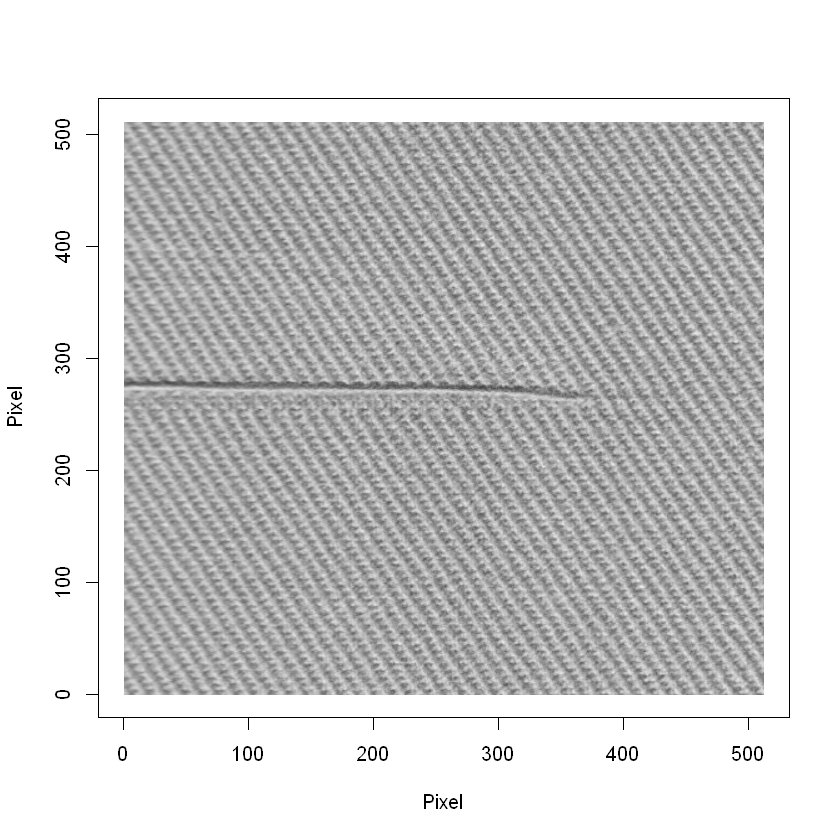

In [4]:
plot(NA,xlab="Pixel",ylab="Pixel",xlim=c(0,nrow(img4[,,1])),ylim=c(0,ncol(img4[,,1])))
rasterImage(img4[,,1],0,0,nrow(img4[,,1]),ncol(img4[,,1]))

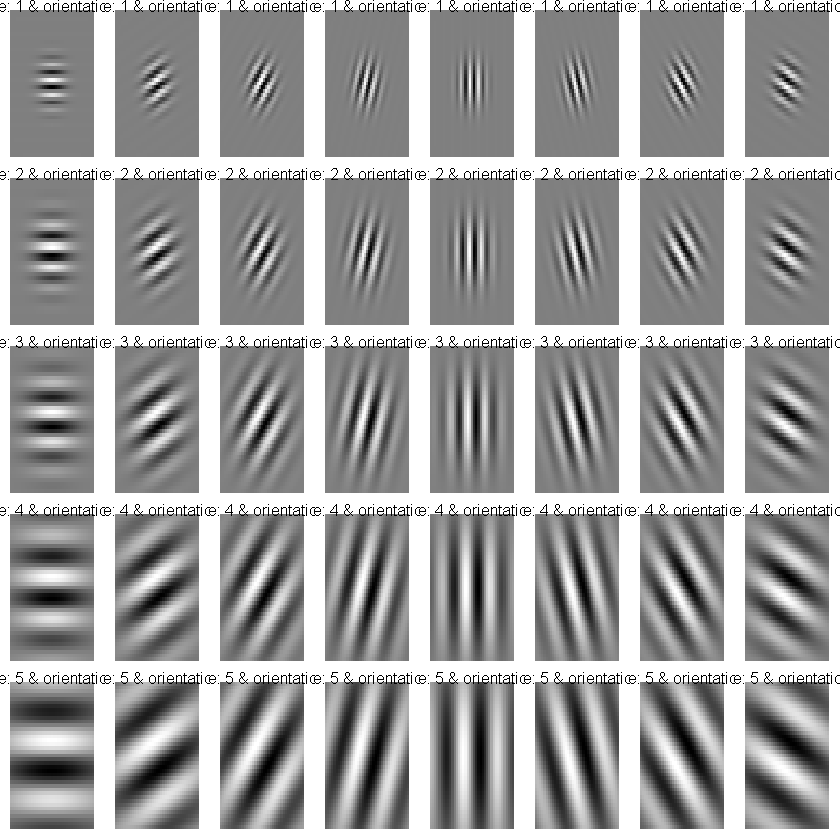

In [5]:
initial_gabor = GaborFeatureExtract$new()
gabor_filter = initial_gabor$gabor_filter_bank(scales = 5, orientations = 8, gabor_rows = 39, gabor_columns = 39, plot_data = TRUE)
plt_filter = initial_gabor$plot_gabor(real_matrices = gabor_filter$gabor_real, margin_btw_plots = 0.65,thresholding = FALSE)

In [6]:
str(gabor_filter)

List of 3
 $ gaborArray     :List of 40
  ..$ : cplx [1:39, 1:39] -1.58e-12-0.00i 0.00-5.02e-12i 1.50e-11-0.00i ...
  ..$ : cplx [1:39, 1:39] 4.86e-08-3.96e-08i 1.02e-07+4.63e-08i 6.31e-09+1.93e-07i ...
  ..$ : cplx [1:39, 1:39] 6.24e-06-6.24e-06i 1.18e-05+0.00i 1.10e-05+1.10e-05i ...
  ..$ : cplx [1:39, 1:39] -6.69e-05-3.18e-05i -4.63e-05-7.20e-05i -1.60e-06-9.81e-05i ...
  ..$ : cplx [1:39, 1:39] 1.40e-04+5.81e-05i 1.15e-04+1.15e-04i 6.68e-05+1.61e-04i ...
  ..$ : cplx [1:39, 1:39] 1.52e-12+4.30e-13i -7.80e-13+4.96e-12i -1.50e-11-5.43e-13i ...
  ..$ : cplx [1:39, 1:39] 4.04e-08-4.79e-08i 1.10e-07+1.74e-08i 7.31e-08+1.79e-07i ...
  ..$ : cplx [1:39, 1:39] 5.33e-06+7.04e-06i -9.17e-07+1.18e-05i -1.12e-05+1.08e-05i ...
  ..$ : cplx [1:39, 1:39] 6.96e-05+2.54e-05i 5.56e-05+6.51e-05i 1.89e-05+9.63e-05i ...
  ..$ : cplx [1:39, 1:39] -4.8e-05-1.44e-04i 6.4e-06-1.63e-04i 6.8e-05-1.61e-04i ...
  ..$ : cplx [1:39, 1:39] -1.55e-12-3.20e-13i -1.27e-12-4.86e-12i 1.13e-11-9.85e-12i ...
  ..$ : cpl

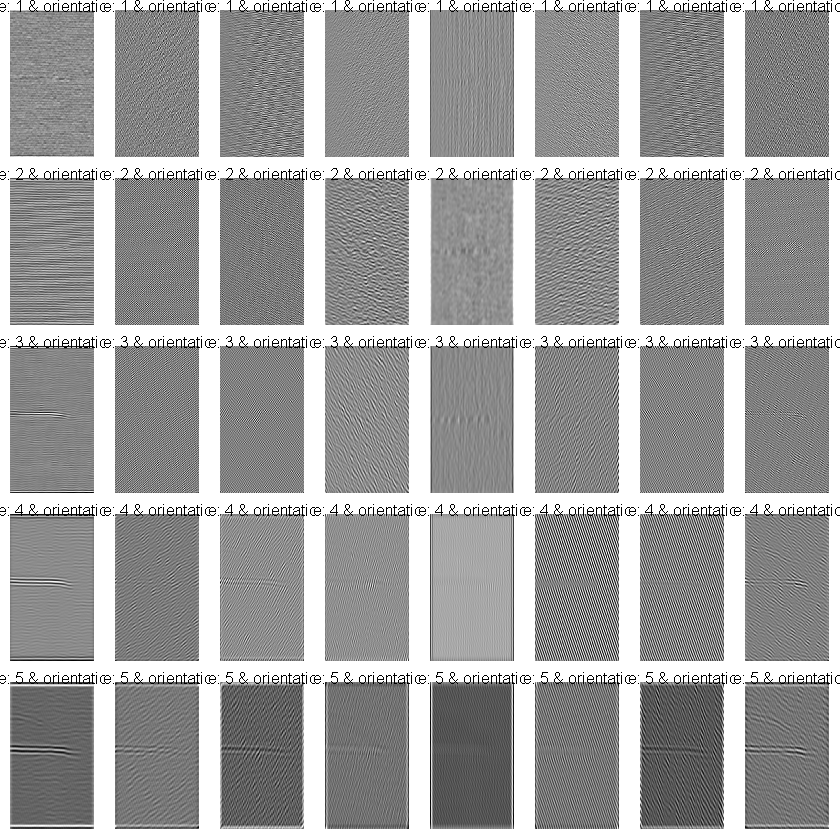

In [7]:
gabor_img = initial_gabor$gabor_feature_extraction(image = img4[,,1], scales = 5, orientations = 8,

                                         downsample_gabor = FALSE, downsample_rows = NULL,

                                          downsample_cols = NULL, gabor_rows = 39, 
                                          
                                          gabor_columns = 39, plot_data = TRUE, 
                                          
                                          normalize_features = FALSE, threads = 3)
plt_img = initial_gabor$plot_gabor(real_matrices = gabor_img$gabor_features_real, margin_btw_plots = 0.65, thresholding = FALSE)

In [8]:
for(i in 1:20){
    name1<-paste("gf1_img",i,sep="")
    name2<-paste("img",i,sep="")
    assign(name1, gabor.filter(eval(parse(text = name2))[,,1], lamda=5, theta=0, bw=1.5, phi=0, asp=1, disp=FALSE)$filtered_img/max(gabor.filter(eval(parse(text = name2))[,,1], lamda=5, theta=0, bw=1.5, phi=0, asp=1, disp=FALSE)$filtered_img))   
}

In [9]:
for(i in 1:20){
    name1<-paste("gf2_img",i,sep="")
    name2<-paste("img",i,sep="")
    assign(name1, gabor.filter(eval(parse(text = name2))[,,1], lamda=5, theta=90, bw=1.5, phi=0, asp=1, disp=FALSE)$filtered_img/max(gabor.filter(eval(parse(text = name2))[,,1], lamda=5, theta=90, bw=1.5, phi=0, asp=1, disp=FALSE)$filtered_img))   
}

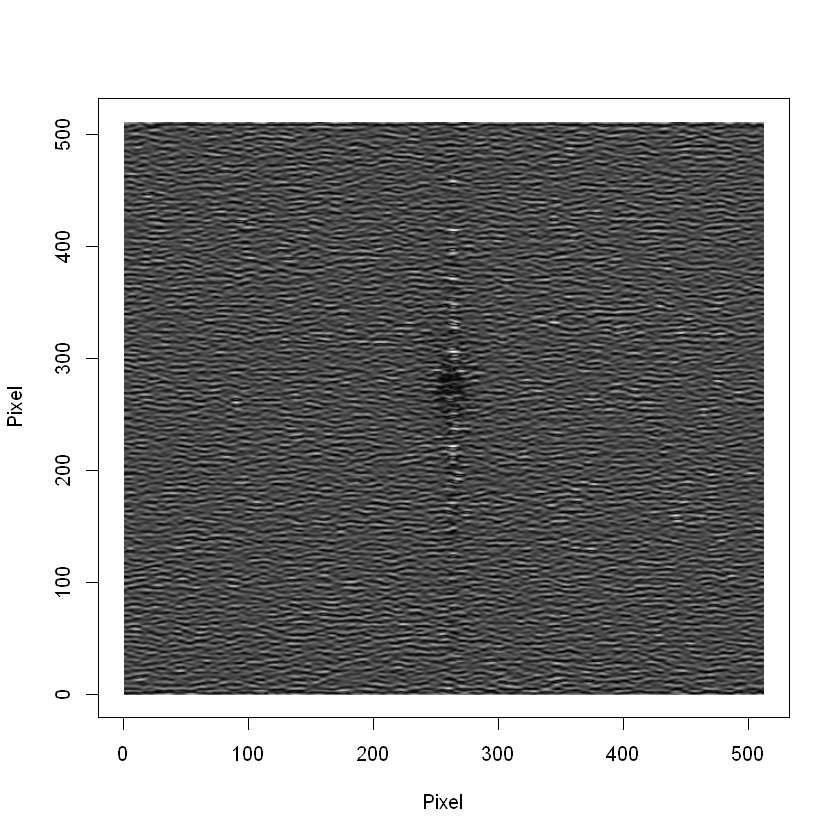

In [10]:
plot(NA,xlab="Pixel",ylab="Pixel",xlim=c(0,nrow(gf1_img16)),ylim=c(0,ncol(gf1_img16)))
rasterImage(gf1_img16,0,0,nrow(gf1_img16),ncol(gf1_img16))

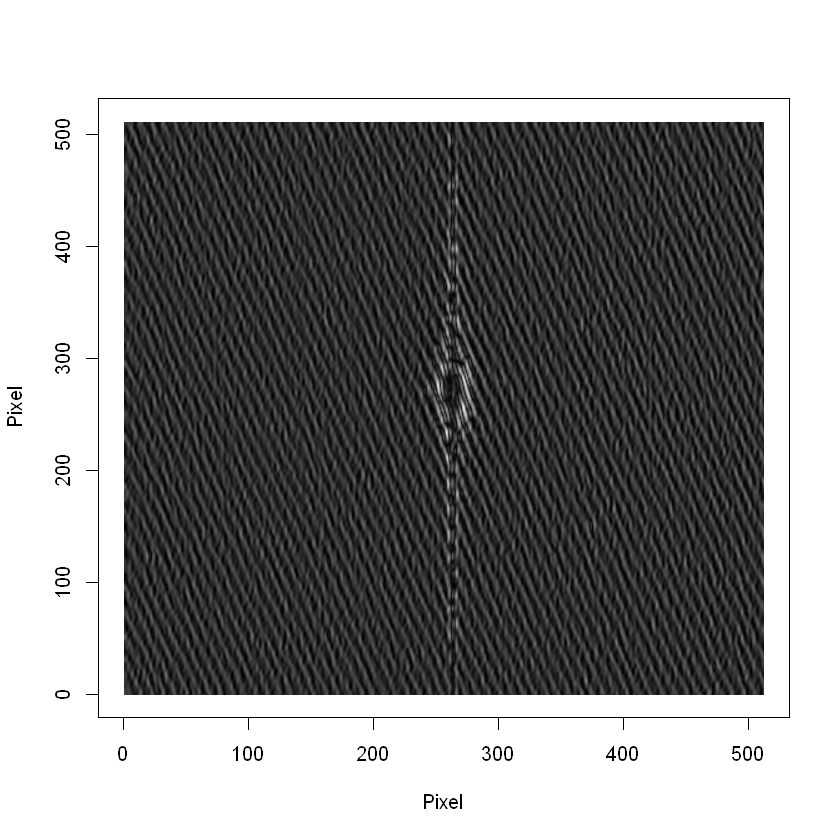

In [11]:
plot(NA,xlab="Pixel",ylab="Pixel",xlim=c(0,nrow(gf2_img16)),ylim=c(0,ncol(gf2_img16)))
rasterImage(gf2_img16,0,0,nrow(gf2_img16),ncol(gf2_img16))


Call:
mqcc(data = X, type = "T2")

T2 chart for X 

Summary of group statistics:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0039   0.7227   2.4512  12.2294   6.6863 823.3299 

Number of variables:  2
Number of groups:  512
Group sample size:  512

Center: 
       X1        X2 
0.1786957 0.1786957 

Covariance matrix:
             X1           X2
X1 9.319242e-03 1.712245e-05
X2 1.712245e-05 9.112261e-03
|S|:  8.491907e-05 

Control limits:
 LCL      UCL
   0 10.42526


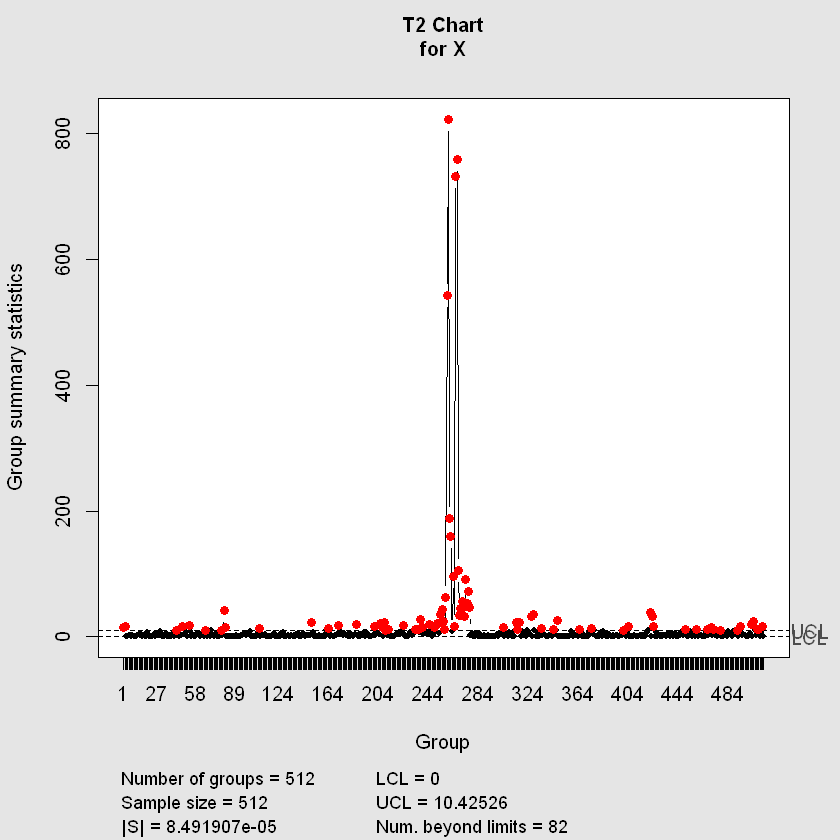

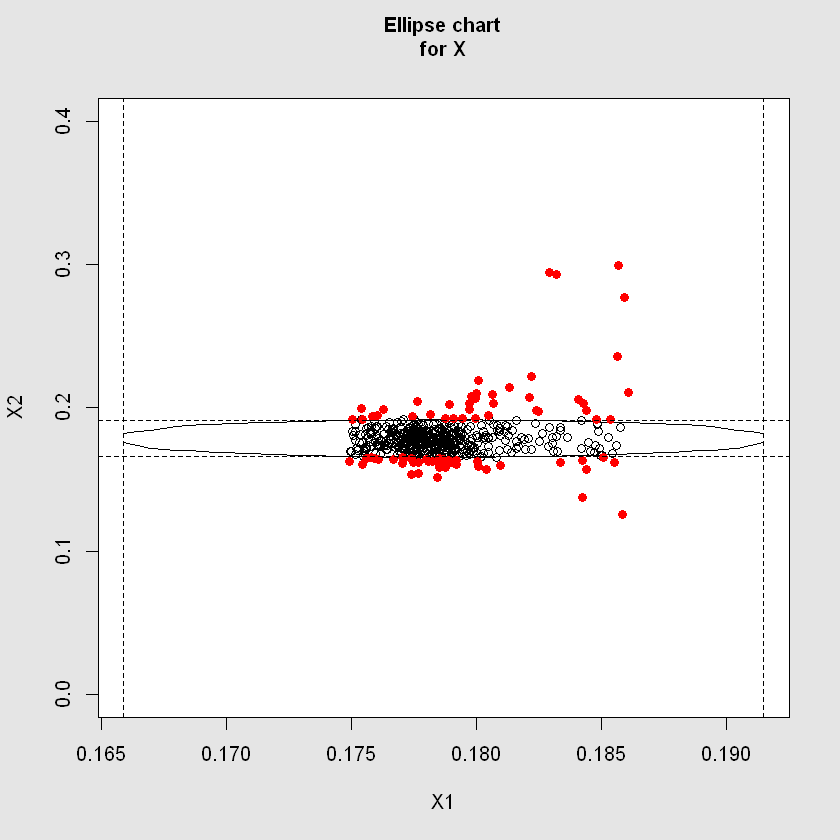

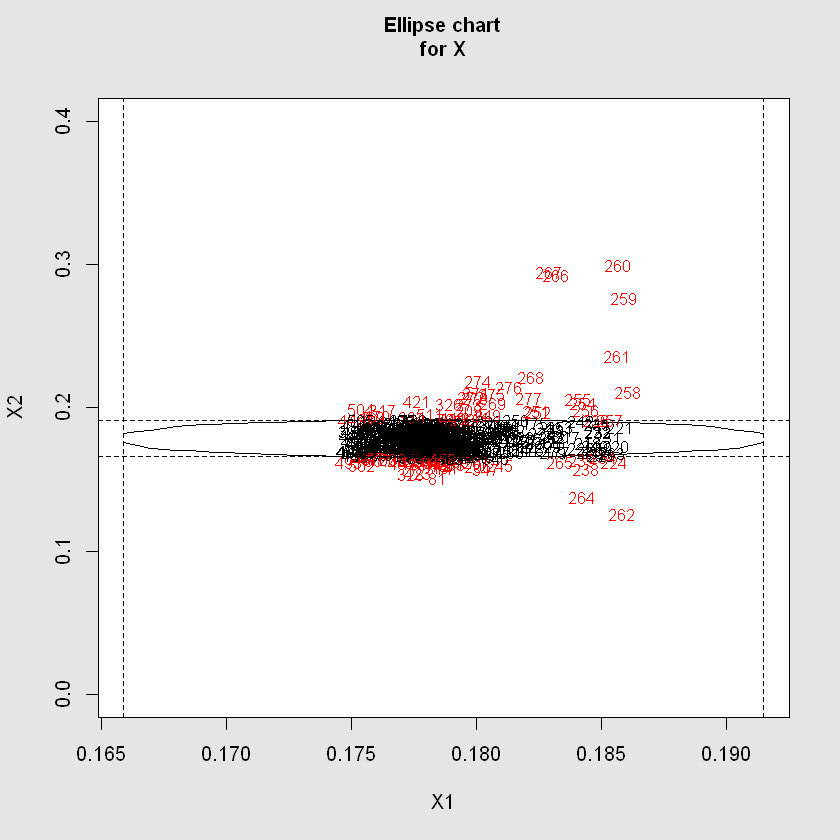

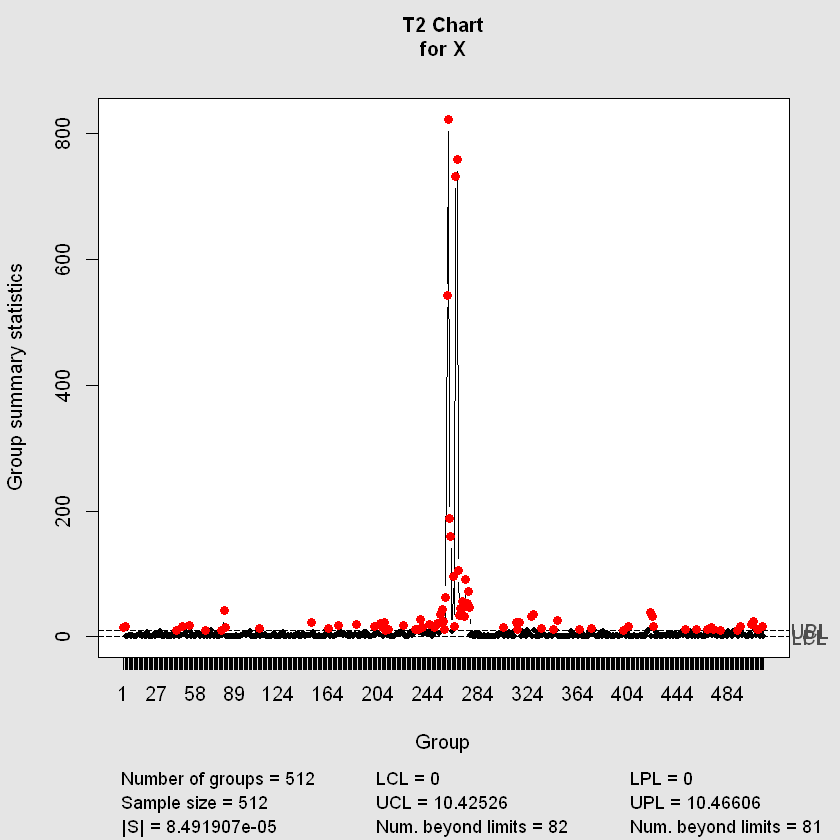


Call:
qcc(data = X1, type = "xbar", confidence.level = q$confidence.level^(1/2))

xbar chart for X1 

Summary of group statistics:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.1749294 0.1772507 0.1782517 0.1786957 0.1795236 0.1860759 

Group sample size:  512
Number of groups:  512
Center of group statistics:  0.1786957
Standard deviation:  0.09653631 

Control limits:
       LCL       UCL
 0.1658967 0.1914946


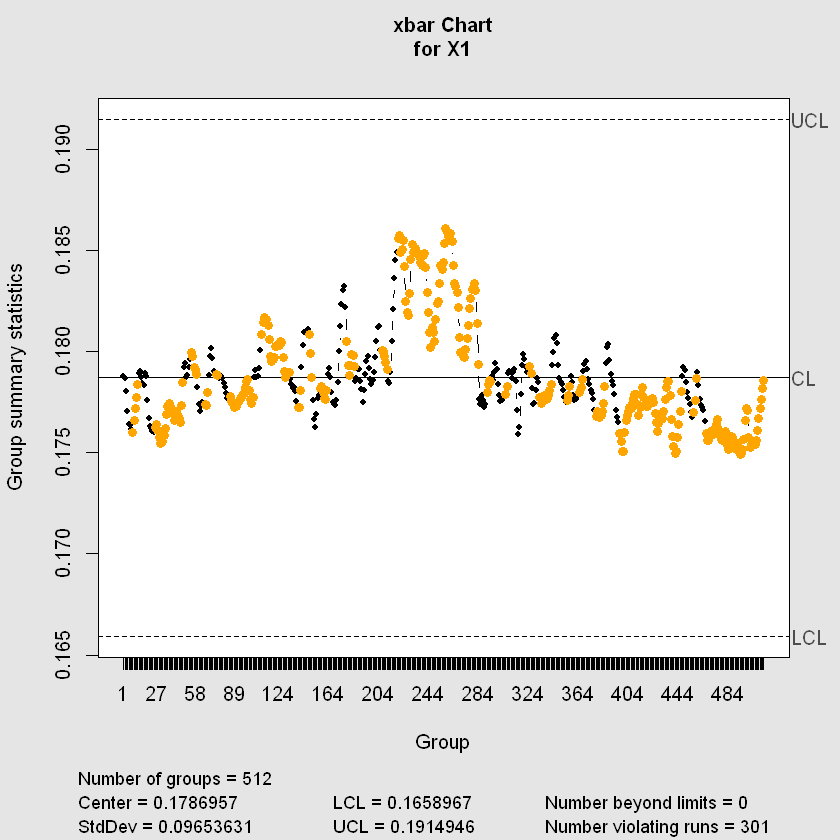


Call:
qcc(data = X2, type = "xbar", confidence.level = q$confidence.level^(1/2))

xbar chart for X2 

Summary of group statistics:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.1259752 0.1711608 0.1776042 0.1786957 0.1835442 0.2995605 

Group sample size:  512
Number of groups:  512
Center of group statistics:  0.1786957
Standard deviation:  0.09545825 

Control limits:
       LCL       UCL
 0.1660397 0.1913517


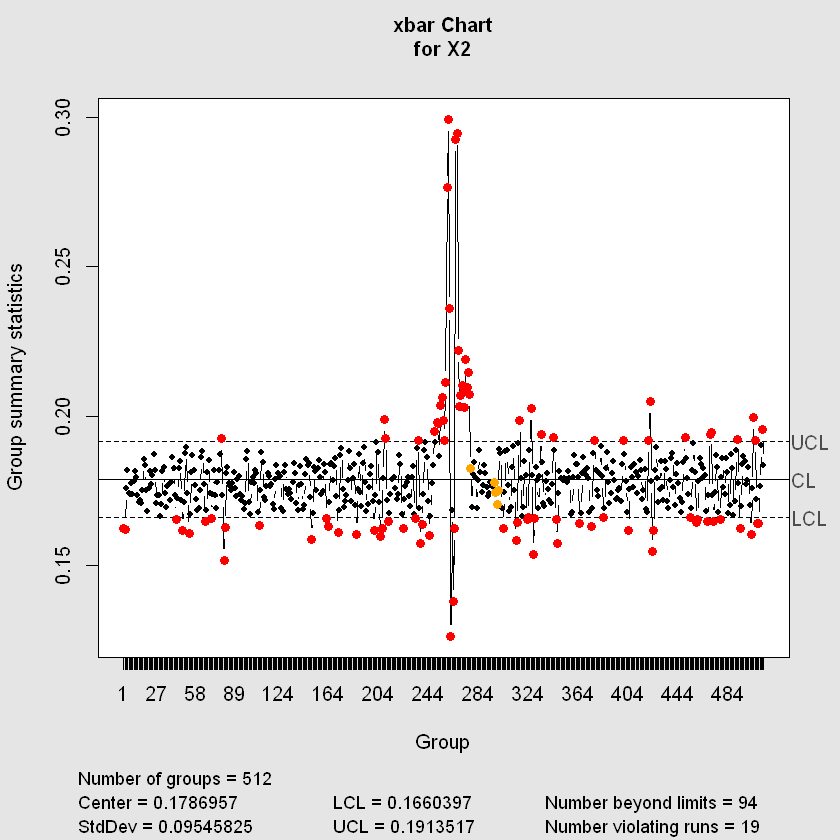

In [12]:
X1 <-gf2_img16
X2 <-t(gf2_img16)
X <- list(X1 = X1, X2 = X2)

q <- mqcc(X, type = "T2")
summary(q)
ellipseChart(q)
ellipseChart(q, show.id = TRUE)

q <- mqcc(X, type = "T2", pred.limits = TRUE)

q1 <- qcc(X1, type = "xbar", confidence.level = q$confidence.level^(1/2))
summary(q1)
q2 <- qcc(X2, type = "xbar", confidence.level = q$confidence.level^(1/2))
summary(q2)

## Results

In the experiment we execute, normally 20 images are needed to be controlled with 40 different Gabor filters. That scenario would bring us a huge computational burden and a variation distributed widely over a huge number of attributes. However, as we experienced throughout, the variations are intensified in the very opposite ends;  = 0 and  = /2, which are Gabor Filter 1 and Gabor Filter 2.
	
If we were to simplify the number of attributes to these two attributes and control the images for these two, we would get into consideration high amount of variability and get rid of the huge computational burden that comes out of the nature of the Gabor filters. That way, we execute 2 filters to 20 different images and sketch the control charts for each one of them.
	
For the sake of simplicity, we examined the two approaches (gf1 and gf2) to the 16th image as it can be seen in our code. To execute the filters more precisely, each row and each column of the image are considered as different samples. After the filters are executed to image and each of the columns and the rows of the filtered image are considered as samples. we sketched the t^2,X-bar and Ellipse control charts of the image 16 as an example in our code. After that, we can identify the points that are signalling out of control limits and derive the best control chart to use to identify the linens in all of our images. Also, we can identify the increase or decrease trends of the points which can help us to identify the beginning of the defects in the images.

Applying all the Gabor filters to each and every image brings a huge computational effort and burden. That’s why, we had to reduce to attributes and also include the most variability possible so that the variability we did not consider would become negligible. To conclude with, the method we have executed can be used for all of the images and it would definitely reduce the effort and time we spent and we can identify precisely the out of limit points and tendencies of a defect. At last, choosing the control chart that gives us the out of control points and defects easily would help us the examiners to detect the defects and tendencies more easily.

## Conclusions and Future Work

Addressing the defects in textile industry is very crucial in terms of quality and customer satisfaction. Therefore, we went over the related literature and decided to use Gabor Feature Extraction algorithm which is described in previous parts. To fully follow the Gabor Feature Extraction procedure, we should apply 40 filters to each image. However, this requires lots of computational power and time. Thus, we decided to apply only 2 filters which are vertical and horizontal. Also, most defects in linen manufacturing are vertical or horizontally oriented. This makes our methodology more coherent. Afterwards we drew couple of control charts such as T2 chart and we observed that the T2 chart for 16th image clearly shows the defect in that particular image. 

To have a better approach there are two possible solutions:
- In the limited time, we understood the fundamentals of Gabor Feature Extraction algorithm. But, it has very advanced math behind the scene. We believe that if we study more on this topic, we may apply the procedure better. 
- As we stated before, applying the full procedure requires lots of computational power and time. Therefore, if we use better hardware, the outcome may be better.


## References

1) http://www.businessdictionary.com/definition/defect.html

2) 
https://pdfs.semanticscholar.org/7b15/6f167537e2d8d260a00dfab8960a0a4bc187.pdf

3) Zhang Y.F., Bresee, R. R. ‘Fabrik Detection and Classification Using Image Analysis’, Textile Research Journal, 65, 1, 1995, pp.1-9.
